In [48]:
import numpy as np
import pandas as pd

from fbprophet import Prophet

import chess_stats as cs

In [59]:
#choose chess.com username to get data from 
df = cs.game_stats_df('cesdaycart')

In [60]:
#filter by chess game type and time control
df = df[(df['rules'] == 'chess') & (df['time_class'] == 'blitz')]

#convert end_time column to a date time object in order to resample
df['end_time'] = pd.to_datetime(df['end_time'])

#resample the data by day and take the mean rating. Forward fill NA values.
ts_hourly_df = df.resample('D', on='end_time').mean().fillna(method='ffill')[['player_rating']]

#create new data frame which contains only the timesteps and ratings, named 'ds' and 'y' respectively.
ts = pd.DataFrame({'ds':ts_hourly_df.index, 'y': ts_hourly_df.values.flatten()})

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/envs/python3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


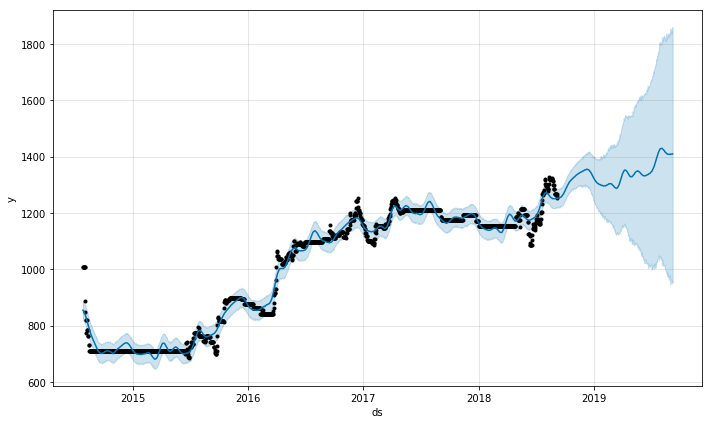

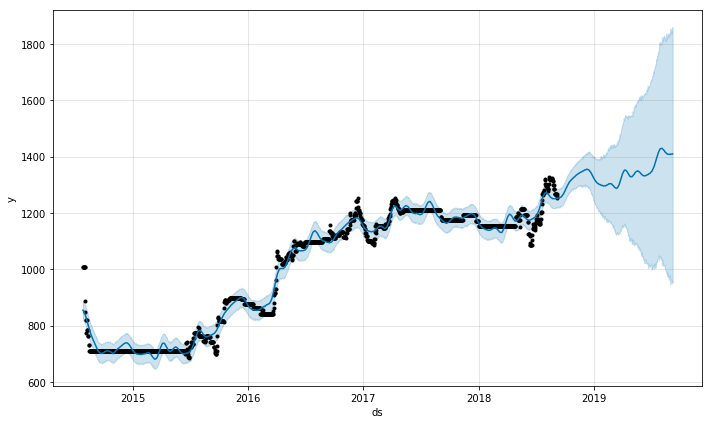

In [61]:
#instanciate prophet object
model = Prophet()

#fit model to created dataframe
model.fit(ts)

#create dataframe containing future timesteps a year into the future
future = model.make_future_dataframe(periods=365, freq='D')

#make predictions on the future timesteps
forecast = model.predict(future)

#plot the forecast
model.plot(forecast)

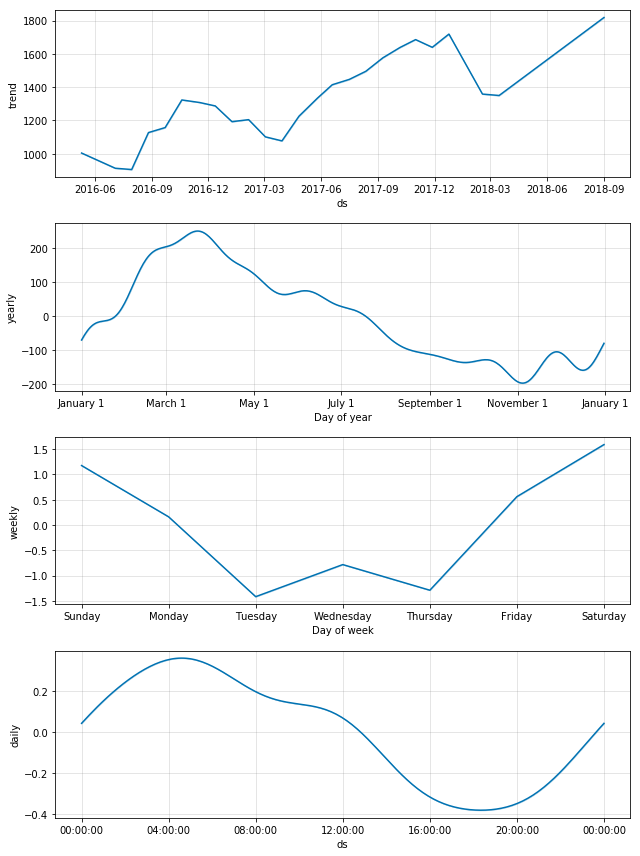

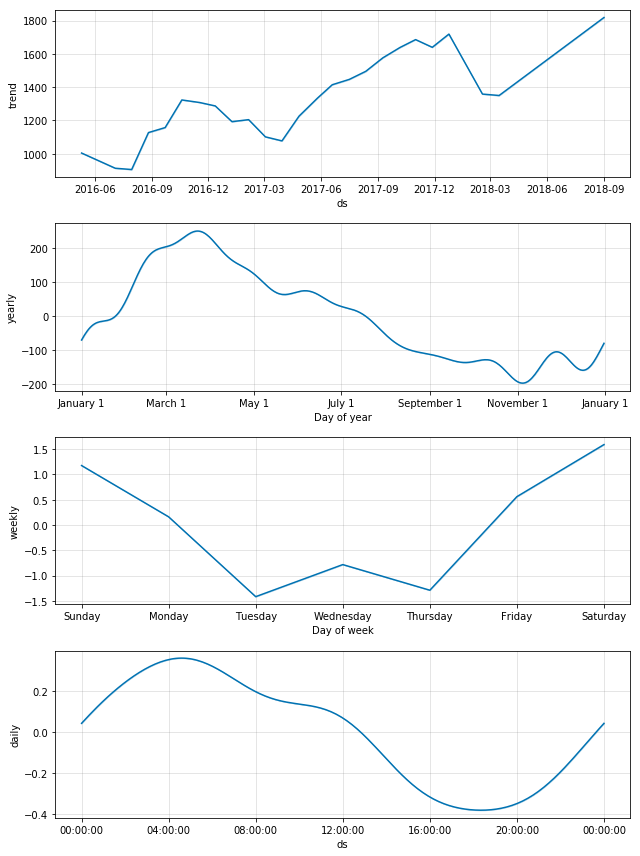

In [58]:
#plot the different components of the forecast (trend, yearly, weekly)
model.plot_components(forecast)